In [2]:
# one needs to import those packages which are needed; best to be done at the beginning of the program.
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import k_clique_communities

from community import community_louvain


import numpy as np
import scipy as sp
import pandas as pd


# some basic settings for plotting figures
import matplotlib.pyplot as plt
%matplotlib inline 
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 32}

plt.rc('font', **font)

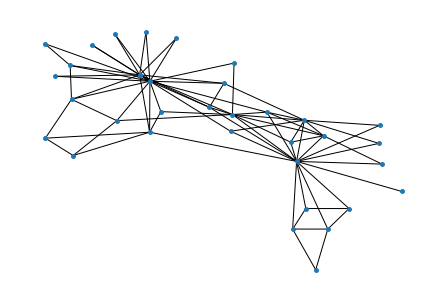

In [2]:
Ge=nx.karate_club_graph()
# Ge=nx.path_graph(8)
path_lengths=dict(nx.all_pairs_shortest_path_length(Ge))
# print(path_lengths[0][15])
nx.draw(Ge,node_size = 15)

# Louvain

# of partitions for Louvain modularity = 4


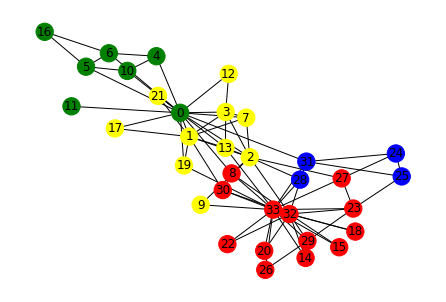

In [3]:
partLouvain = community_louvain.best_partition(Ge)
number_of_communities = max(list(partLouvain.values()))+1
print('# of partitions for Louvain modularity =',number_of_communities)

colors = ['green','red','blue','yellow']
color_map_louvain = []
for idx, node in enumerate(Ge):
    color_map_louvain.append(colors[partLouvain[idx]])

my_pos = nx.spring_layout(Ge, seed = 101)
nx.draw(Ge, pos = my_pos, node_color=color_map_louvain, with_labels=True)
plt.show()

# Girvan Newman

({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})


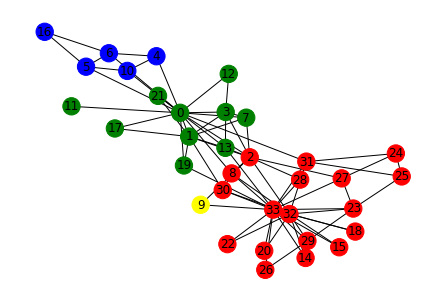

In [4]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools

k = 4 #number of communities to separate into
colors = ['green','red','blue','yellow','purple']

comp = girvan_newman(Ge)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
#     print(tuple(sorted(c) for c in communities))
    continue
node_groups = communities

print(node_groups)


color_map_newman = []
for node in Ge:
    for i in range(k):
        if node in node_groups[i]:
            color_map_newman.append(colors[i]) 

my_pos = nx.spring_layout(Ge, seed = 101)
nx.draw(Ge, pos = my_pos, node_color=color_map_newman, with_labels=True)
plt.show()

# Show both plots together

community detection on karate club network
---louvain community detection


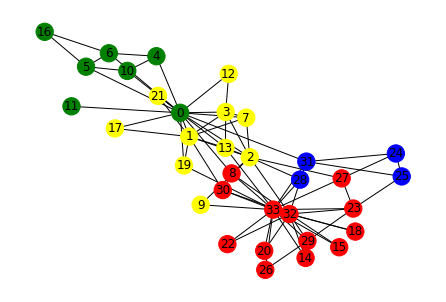

---girvan newman (edge centrality) community detection with the same number of communities


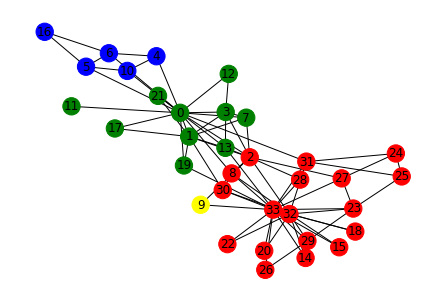

In [5]:
print("community detection on karate club network")
print("---louvain community detection")
my_pos = nx.spring_layout(Ge, seed = 101)
nx.draw(Ge, pos = my_pos, node_color=color_map_louvain, with_labels=True)
plt.show()

print("---girvan newman (edge centrality) community detection with the same number of communities")
my_pos = nx.spring_layout(Ge, seed = 101)
nx.draw(Ge, pos = my_pos, node_color=color_map_newman, with_labels=True)
plt.show()

# colour community which includes specific protein

skipped past subdivision
skipped past subdivision
skipped past subdivision
skipped past subdivision
skipped past subdivision
skipped past subdivision
skipped past subdivision


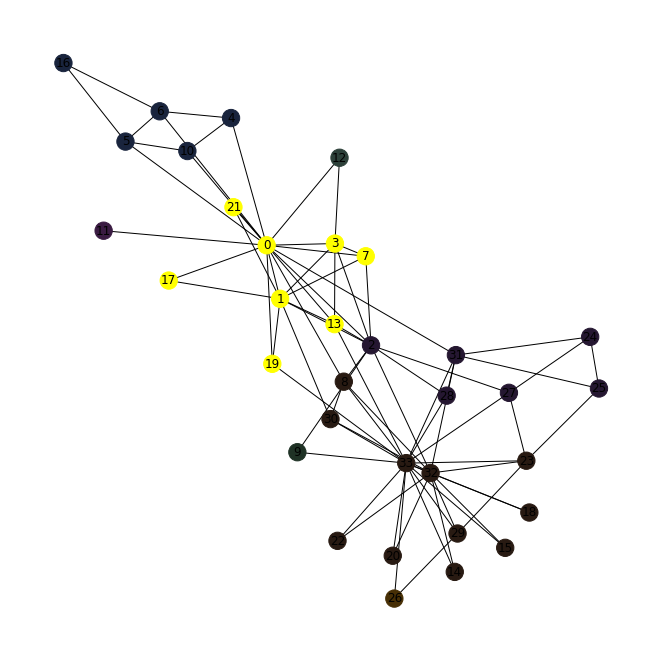

In [56]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools
import random as rd

Gtest = nx.karate_club_graph()

node_target = 0 #for real network, replace with for example '4932.YGR241C'
if not Gtest.has_node(node_target): 
    raise ValueError('The network does not contain this node, so cannot use as target')

k = 8 #number of communities to separate into

#colour of target community
target_colour = 'yellow'
#colours of other communities
colors = []
for i in range(k):
    colors.append((rd.random()/3,rd.random()/3,rd.random()/3))

    
    
comp = girvan_newman(Gtest) #Girvan and Newman communities


limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print('skipped past subdivision')
    continue
node_groups = communities



color_map_newman = []

target_com = 0
for i in range(k): #Find target community
    if node_target in node_groups[i]:
        target_com = i 

for node in Gtest:
    if node in node_groups[target_com]: #colour target community
        color_map_newman.append(target_colour)
        continue
        
    for j, node_group in enumerate(node_groups): #colour other communities
        if node in node_group:
            color_map_newman.append(colors[j])

            
#Draw graph            
my_pos = nx.spring_layout(Gtest, seed = 101)
plt.figure(1,figsize=(9,9)) 
nx.draw(Gtest, pos = my_pos, node_color=color_map_newman, with_labels=True)
plt.show()